In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [2]:

batch_size = 128
n_channels, w, h = 3, 64, 64


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

n_labels = len(classes)


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = datasets.CIFAR10(root='data/cifar10-64/train', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testset = datasets.CIFAR10(root='data/cifar10-64/test', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)



In [ ]:

# model = nn.Sequential(
#     nn.Conv2d(
#         in_channels=3,
#         out_channels=6,
#         kernel_size=5
#     ),
#     nn.LeakyReLU(),
#      nn.Conv2d(
#         in_channels=6,
#         out_channels=16,
#         kernel_size=5
#     ),
#     nn.LeakyReLU(),
#      nn.Conv2d(
#         in_channels=16,
#         out_channels=16,
#         kernel_size=5
#     ),
#     nn.LeakyReLU(),
#     nn.Flatten(1),
#     nn.Linear(
#         5*5*16*16,
#         256),
#     nn.Linear(
#         256,
#         n_labels),
#     nn.Softmax(dim=1)
# )

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 4, padding=1)
        self.conv1b = nn.Conv2d(6, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv2b = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, n_labels)
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1b(F.leaky_relu(self.conv1(x)))))
        x = self.pool(F.leaky_relu(self.conv2b(F.leaky_relu(self.conv2(x)))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.dropout(self.fc2(x)))
        x = self.dropout(self.fc3(x))
        return self.softmax(x)	
    
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Playing on {device}")

In [ ]:
model = Net()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
adam = torch.optim.AdamW(model.parameters(), lr=0.001)

  0%|          | 1/500 [00:04<34:07,  4.10s/it]

Epoch 0: 2.153472900390625


  2%|▏         | 11/500 [00:41<30:09,  3.70s/it]

Epoch 10: 1.9678245782852173


  4%|▍         | 21/500 [01:18<29:27,  3.69s/it]

Epoch 20: 1.8668291568756104


  6%|▌         | 31/500 [01:55<28:28,  3.64s/it]

Epoch 30: 1.765027642250061


  8%|▊         | 41/500 [02:30<25:50,  3.38s/it]

Epoch 40: 1.7990211248397827


 10%|█         | 51/500 [03:02<24:11,  3.23s/it]

Epoch 50: 1.7281320095062256


 12%|█▏        | 61/500 [03:37<25:43,  3.52s/it]

Epoch 60: 1.7720664739608765


 14%|█▍        | 71/500 [04:13<24:52,  3.48s/it]

Epoch 70: 1.734222412109375


 16%|█▌        | 81/500 [04:48<24:03,  3.45s/it]

Epoch 80: 1.7107635736465454


 18%|█▊        | 91/500 [05:30<33:11,  4.87s/it]

Epoch 90: 1.694604516029358


 20%|██        | 101/500 [06:04<22:28,  3.38s/it]

Epoch 100: 1.7279281616210938


 22%|██▏       | 111/500 [06:38<21:55,  3.38s/it]

Epoch 110: 1.680398941040039


 24%|██▍       | 121/500 [07:13<21:26,  3.40s/it]

Epoch 120: 1.6860322952270508


 26%|██▌       | 131/500 [07:45<20:06,  3.27s/it]

Epoch 130: 1.7211320400238037


 28%|██▊       | 141/500 [08:21<23:31,  3.93s/it]

Epoch 140: 1.7024472951889038


 30%|███       | 151/500 [09:17<32:22,  5.57s/it]

Epoch 150: 1.7892436981201172


 32%|███▏      | 161/500 [10:14<31:37,  5.60s/it]

Epoch 160: 1.7256091833114624


 34%|███▍      | 171/500 [11:09<30:32,  5.57s/it]

Epoch 170: 1.6571414470672607


 36%|███▌      | 181/500 [12:06<30:03,  5.65s/it]

Epoch 180: 1.7041866779327393


 38%|███▊      | 191/500 [13:05<30:39,  5.95s/it]

Epoch 190: 1.7250064611434937


 40%|████      | 201/500 [14:00<23:58,  4.81s/it]

Epoch 200: 1.747588872909546


 42%|████▏     | 211/500 [14:42<20:26,  4.24s/it]

Epoch 210: 1.7961995601654053


 44%|████▍     | 221/500 [15:24<19:40,  4.23s/it]

Epoch 220: 1.7027902603149414


 46%|████▌     | 231/500 [16:06<18:50,  4.20s/it]

Epoch 230: 1.7724279165267944


 48%|████▊     | 241/500 [16:48<18:05,  4.19s/it]

Epoch 240: 1.717111587524414


 50%|█████     | 251/500 [17:30<17:29,  4.22s/it]

Epoch 250: 1.746429681777954


 52%|█████▏    | 261/500 [18:17<19:28,  4.89s/it]

Epoch 260: 1.7085561752319336


 54%|█████▍    | 271/500 [19:09<20:22,  5.34s/it]

Epoch 270: 1.760886549949646


 56%|█████▌    | 281/500 [19:52<15:36,  4.28s/it]

Epoch 280: 1.712707281112671


 58%|█████▊    | 291/500 [20:34<14:42,  4.22s/it]

Epoch 290: 1.6717456579208374


 60%|██████    | 301/500 [21:16<13:57,  4.21s/it]

Epoch 300: 1.8154630661010742


 62%|██████▏   | 311/500 [21:59<13:20,  4.23s/it]

Epoch 310: 1.8758666515350342


 64%|██████▍   | 321/500 [22:41<12:31,  4.20s/it]

Epoch 320: 1.7704169750213623


 66%|██████▌   | 331/500 [23:23<11:46,  4.18s/it]

Epoch 330: 1.8395789861679077


 68%|██████▊   | 341/500 [24:05<11:16,  4.25s/it]

Epoch 340: 1.8878551721572876


 70%|███████   | 351/500 [24:47<10:27,  4.21s/it]

Epoch 350: 1.8274742364883423


 72%|███████▏  | 361/500 [25:29<09:41,  4.19s/it]

Epoch 360: 1.966970443725586


 74%|███████▍  | 371/500 [26:12<09:46,  4.54s/it]

Epoch 370: 1.7812172174453735


 76%|███████▌  | 381/500 [27:04<10:03,  5.07s/it]

Epoch 380: 1.7630259990692139


 78%|███████▊  | 391/500 [27:54<09:06,  5.02s/it]

Epoch 390: 1.7746455669403076


 80%|████████  | 401/500 [28:44<08:15,  5.01s/it]

Epoch 400: 1.794380784034729


 82%|████████▏ | 411/500 [29:34<07:23,  4.99s/it]

Epoch 410: 1.847515344619751


 84%|████████▍ | 421/500 [30:25<06:39,  5.06s/it]

Epoch 420: 1.854641318321228


 86%|████████▌ | 431/500 [31:00<03:51,  3.36s/it]

Epoch 430: 1.7927935123443604


 88%|████████▊ | 441/500 [31:32<03:04,  3.13s/it]

Epoch 440: 1.8100202083587646


 90%|█████████ | 451/500 [32:03<02:33,  3.13s/it]

Epoch 450: 1.825321912765503


 92%|█████████▏| 461/500 [32:34<02:00,  3.09s/it]

Epoch 460: 1.828851342201233


 94%|█████████▍| 471/500 [33:06<01:31,  3.15s/it]

Epoch 470: 1.726117491722107


 96%|█████████▌| 481/500 [33:37<01:00,  3.17s/it]

Epoch 480: 1.866094946861267


 98%|█████████▊| 491/500 [34:08<00:28,  3.12s/it]

Epoch 490: 2.008885145187378


100%|██████████| 500/500 [34:37<00:00,  4.15s/it]


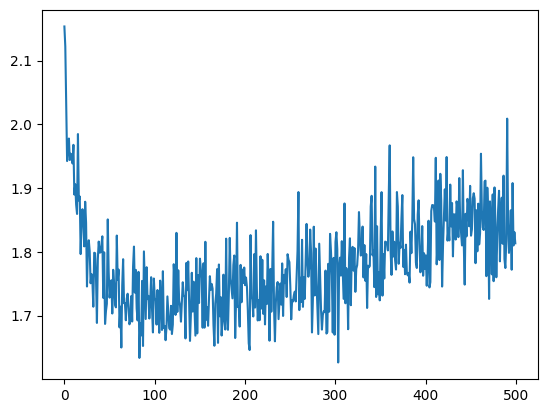

In [5]:
import time
losses = []

for e in tqdm(range(500)):
    for images, labels in trainloader:
        images = images.to("cuda")
        labels = labels.to("cuda")
        labels_hat_dist = model(images)
        adam.zero_grad()
        loss = criterion(labels_hat_dist, labels)
        loss.backward()
        adam.step()
    losses.append(loss.item())
    if e % 10 == 0:
        print(f"Epoch {e}: {loss.item()}")

plt.plot(losses)
plt.show()

PATH = f'models/{time.strftime("%m%d-%H%M%S")}.pth'
torch.save(model.state_dict(), PATH)


In [6]:

images, labels = next(iter(testloader))
images = images.to("cuda")
labels = labels.to("cuda")

# Inside train loop
images.requires_grad = True
labels_hat_dist = model(images)
loss = criterion(labels_hat_dist, labels)
loss.backward()

print("Original loss", loss.item())


step = images.grad.sign()
perturbed_image = images + 0.2*step
perturbed_image = torch.clamp(perturbed_image, 0, 1)

labels_hat_dist = model(perturbed_image)
loss = criterion(labels_hat_dist, labels)
print("Adv loss", loss.item())

Original loss 1.8980199098587036
Adv loss 2.225947618484497


GroundTruth:  frog  frog  bird  dog  
Predicted:  frog  cat   bird  car  
Averserial:  frog  cat   frog  cat  
Delta loss: 0.07489347457885742
	Original loss: 2.049837350845337
	Adversarial loss: 2.1247308254241943


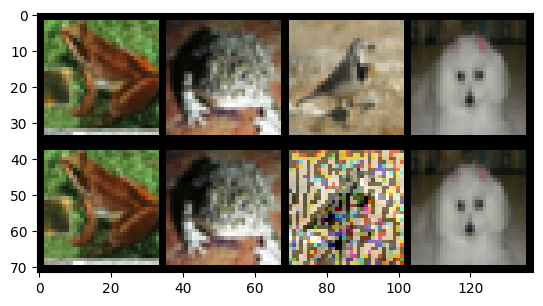

In [77]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

images = images / 2 + 0.5

limit = 124

losses = []

grid = utils.make_grid(images[:(len(labels)-limit)])
# print images

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels)-limit)))

net = model
#net.load_state_dict(torch.load(PATH, weights_only=True))

images, labels = images.to("cuda"), labels.to("cuda")

images.requires_grad = True

outputs = net(images)
loss = criterion(outputs, labels)
loss.backward()

losses.append(loss.item())

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels)-(limit))))

step = images.grad.sign()

perturbed_image = images + 0.2*step
perturbed_image = torch.clamp(perturbed_image, 0, 1)

grid_n = utils.make_grid(perturbed_image[:(len(labels)-limit)])

grod = np.concatenate((np.transpose(grid, (1, 2, 0)),np.transpose(grid_n.cpu(), (1, 2, 0))))
# print images
plt.imshow(grod)

labels_hat_dist = model(perturbed_image)
loss = criterion(labels_hat_dist, labels)

losses.append(loss.item())

_, predicted = torch.max(labels_hat_dist, 1)

print('Averserial: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels)-(limit))))

print(f'Delta loss: {np.abs(losses[0]-losses[1])}\n\tOriginal loss: {losses[0]}\n\tAdversarial loss: {losses[1]}')

In [71]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
accuracies = []
with torch.no_grad():
    for _ in tqdm(range(10)):
        for data in testloader:
            images, labels = data
            images, labels = images.to("cuda"), labels.to("cuda")
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracies.append(100 * correct / total)

print(f'Accuracy of the network on the 10000 test images: {np.mean(accuracies):.3f} %')

100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

Accuracy of the network on the 10000 test images: 54.081 %
